## Professor provided follow up notes in regards to my question about least action formulation and integrating over all possible states
- interesting
- kinda understand
- will use this notebook as a playground to explore

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
#vars
t, x, p, V = sp.symbols('t x p V', real=True)
epsilon = sp.Symbol('ε', positive=True, real=True)

#wigner function will be W_epsilon
W_epsilon = sp.Function('W')(t, x, p, epsilon)
print('Wigner is: ')
display(W_epsilon)

#schoding evolation for wigner
dW_dt = sp.Derivative(W_epsilon, t)
dW_dx = sp.Derivative(W_epsilon, x)
dW_dp = sp.Derivative(W_epsilon, p)

#quantum correction which vanishis as epsilon goes to zero
quantum_correction = (sp.I * epsilon / 2) * sp.Derivative(V, x) * sp.Derivative(W_epsilon, p)
print('The quantum correction term that vanishes as e->0:')
display(quantum_correction)


#wigner equation
wigner_eq = sp.Eq(dW_dt + p * dW_dx - sp.Derivative(V, x) * dW_dp + quantum_correction, 0)
print('So the wigner equations is: ')
display(wigner_eq)

#now we take lim as e-> zero and should see liouville)
liouville_eq = wigner_eq.subs(epsilon, 0)
print('now we take lim as e-> zero and should see liouville')
display(liouville_eq)



Wigner is: 


W(t, x, p, ε)

The quantum correction term that vanishes as e->0:


I*ε*Derivative(V, x)*Derivative(W(t, x, p, ε), p)/2

So the wigner equations is: 


Eq(p*Derivative(W(t, x, p, ε), x) + I*ε*Derivative(V, x)*Derivative(W(t, x, p, ε), p)/2 - Derivative(V, x)*Derivative(W(t, x, p, ε), p) + Derivative(W(t, x, p, ε), t), 0)

now we take lim as e-> zero and should see liouville


Eq(p*Derivative(W(t, x, p, 0), x) - Derivative(V, x)*Derivative(W(t, x, p, 0), p) + Derivative(W(t, x, p, 0), t), 0)

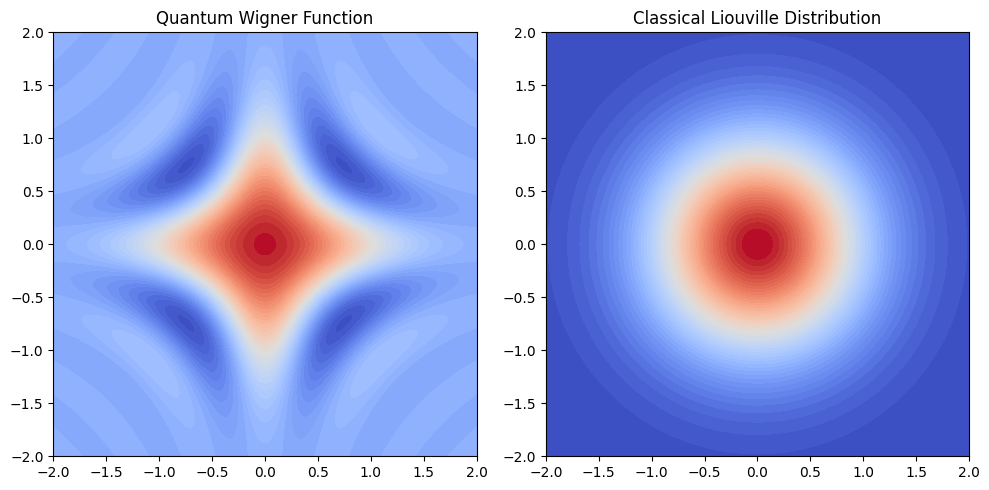

In [3]:
#graphical representation transition from wigner to liou
x_vals = np.linspace(-2, 2, 400)
p_vals = np.linspace(-2, 2, 400)
X, P = np.meshgrid(x_vals, p_vals)

#aribitrary wigner like ex
W_quantum = np.exp(-X**2 - P**2) * np.cos(5 * X * P)

#classical liouville distro with smooth limit
W_classical = np.exp(-X**2 - P**2)

#call plot
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#wigner expresion with added oscillation
axs[0].contourf(X, P, W_quantum, cmap='coolwarm', levels=50)
axs[0].set_title("Quantum Wigner Function")

#liouville smooth classical limit
axs[1].contourf(X, P, W_classical, cmap='coolwarm', levels=50)
axs[1].set_title("Classical Liouville Distribution")

plt.tight_layout()
plt.savefig('Wigner & Liouville.png',dpi=600)
plt.show()

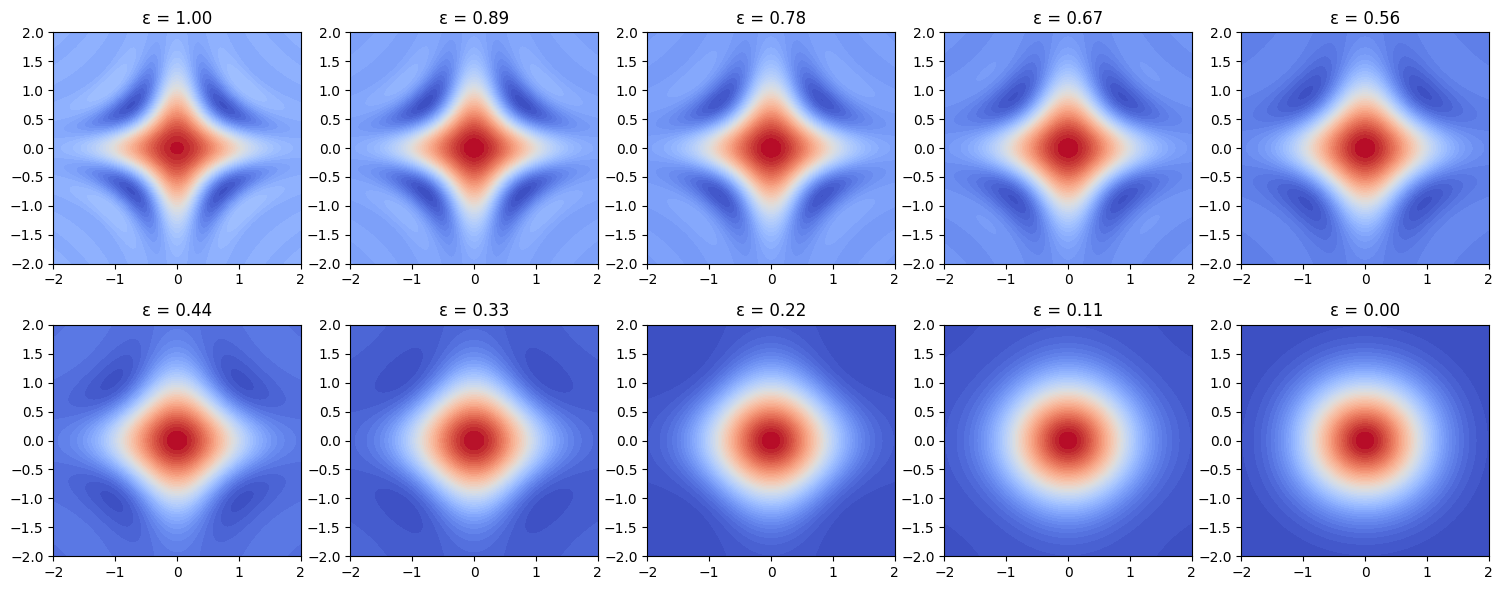

In [4]:
#nframes
num_frames = 10

#x and p vals
x_vals = np.linspace(-2, 2, 400)
p_vals = np.linspace(-2, 2, 400)
X, P = np.meshgrid(x_vals, p_vals)

#loop through pltos for transitions
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
axs = axs.flatten()

for i in range(num_frames):
    epsilon = 1 - i / (num_frames - 1)  #decrease e from 1 to zero

    #same aribtary wigner-like quantum
    W_transition = np.exp(-X**2 - P**2) * np.cos(5 * epsilon * X * P)

    #plot for each val of e
    ax = axs[i]
    contour = ax.contourf(X, P, W_transition, cmap='coolwarm', levels=50)
    ax.set_title(f"ε = {epsilon:.2f}")

plt.tight_layout()
plt.savefig('Wig to Loui in steps.png',dpi=600)
plt.show()


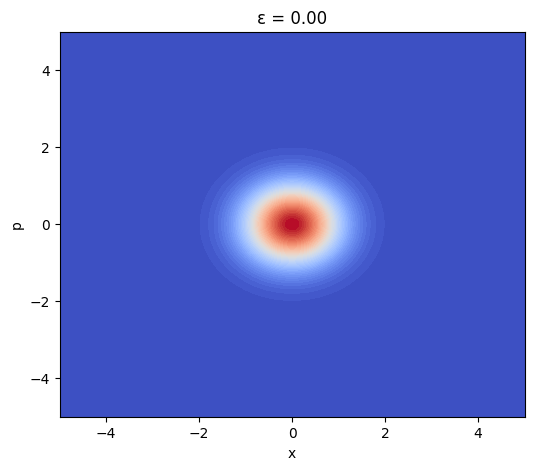

In [ ]:
#num framess
num_frames = 200

#fig ax call
fig, ax = plt.subplots(figsize=(6, 5))

#start contour
contour = None

#x,p, grids
X = np.linspace(-5, 5, 500)
P = np.linspace(-5, 5, 500)
X, P = np.meshgrid(X, P)

#ani update function
def update(frame):
    global contour
    ax.clear()
    
    #i use sine here to go from e=1 to e=0 nd back up like loop/bounce
    epsilon = 0.5 * (1 - np.cos(np.pi * (frame / (num_frames // 2))))
    
    #transition function for contour
    W_transition = np.exp(-X**2 - P**2) * np.cos(5 * epsilon * X * P)

    #update contour plot
    contour = ax.contourf(X, P, W_transition, cmap='coolwarm', levels=50)
    ax.set_title(f"ε = {epsilon:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("p")

#create ani
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=30)

#save ani
ani.save("wig_trans_bounce.gif", writer='pillow', fps=30)